# Portfolio Optimization Analysis

## Introduction
In this analysis, we explore portfolio optimization with a focus on 40 stocks that echo the S&P 500's sector distribution. We'll evaluate their performance and optimize portfolios for maximum Sharpe ratio, return, and minimal risk. A comparative view will highlight shifts from the original S&P 500 sector distribution, offering insights into the balancing act between risk and return within optimized portfolios.

## Load and Analyze the Data
First, let's load the dataset, wich consists of selected 40 stocks representing the S&P 500 index's sector-wise weight distribution. We'll analyze the data to gain insights into the stocks and their respective sectors.

In [18]:
# Load the data
import pandas as pd

stocks_data = pd.read_csv("data/stocks_data.csv")

# Display the first few rows of the DataFrame
stocks_data.head()


,company_name,symbol,sector
0,Apple Inc.,AAPL,Technology
1,Microsoft Corporation,MSFT,Technology
2,\tAlphabet Inc.,GOOG,Communication Services
3,"\tAmazon.com, Inc.",AMZN,Consumer Discretionary
4,Nvidia Corporation,NVDA,Technology


We can see that the dataset contains information about the companies name, stock symbol and sector.

## Distribution of Stocks by Sector
We can visualize the sector-wise distribution of the selected stocks using a pie chart. This visualization helps us understand the initial sector allocations before optimizing the portfolio (assuming each stock have the same weight).

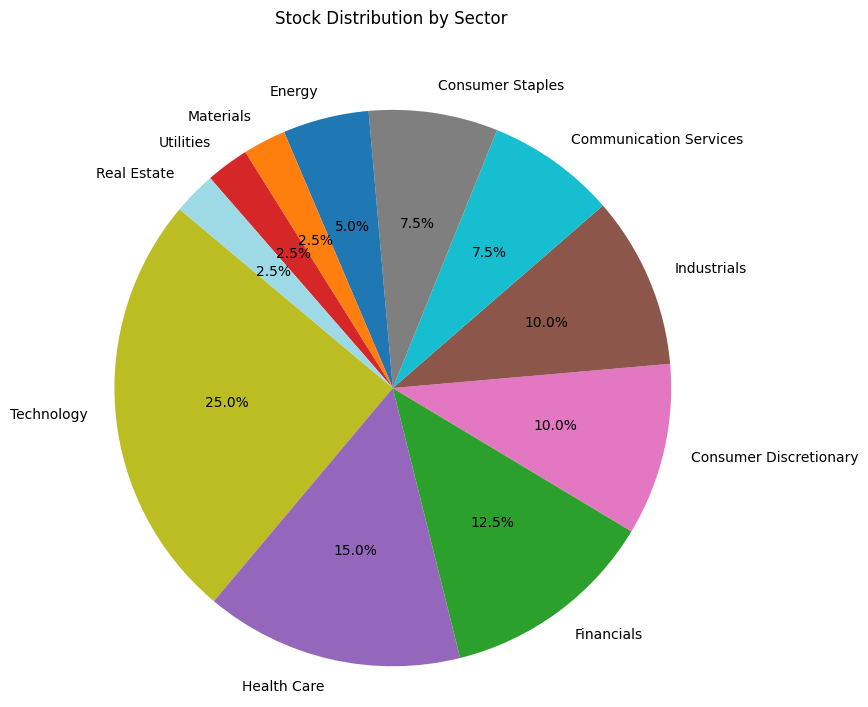

In [19]:
# Plotting the initial distribution by sector
import matplotlib.pyplot as plt
from colors import sector_colors

sector_counts = stocks_data.sector.value_counts()

plt.figure(figsize=(8,8))
plt.pie(sector_counts, labels=sector_counts.index, autopct="%1.1f%%", startangle=140, 
        colors=[sector_colors[sector] for sector in sector_counts.index])
plt.title("Stock Distribution by Sector", y=1.08)
plt.axis("equal")
plt.show()


From the pie chart, it is evident that the Technology sector commands a significant portion of the portfolio, with a **25% weight**. Health Care and Financials follow, constituting **15% and 12.5%** of the portfolio, respectively. These sectors are pivotal in the portfolio's performance due to their substantial allocation. On the flip side, **Real Estate, Utilities, and Materials are the less represented sectors, each holding a 2.5% weight**. This distribution underscores the portfolio’s diverse yet strategic allocation across various sectors.

## Fetch Historical Stock Data
Next, we gather historical stock data. We'll use this data to calculate the **stocks' returns**, wich are essential in portfolio optimization.



In [20]:
# Fetch historical stock data
import yfinance as yf
from datetime import date, timedelta

# Setting the date range (last 10 years)
years = 10
end_date = pd.to_datetime(date.today())
start_date = end_date - timedelta(days=years*365)

# Fetching the data
stocks_symbols = stocks_data.symbol
stocks_price = pd.DataFrame()

for symbol in stocks_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stocks_price[symbol] = stock_data["Close"]

# Displaying the fetched data
stocks_price.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,AAPL,MSFT,GOOG,AMZN,NVDA,TSLA,META,BRK-B,V,JPM,...,CAN,NFLX,LIN,AMD,NEE,PLD,UPS,RTX,HON,BA
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-14,18.862858,38.020000,25.784105,18.370001,4.0550,9.173333,48.990002,115.690002,50.037498,54.400002,...,NaN,48.938572,125.620003,3.52,21.875000,38.990002,100.970001,68.401512,84.535278,135.089996
2013-11-15,18.749643,37.840000,25.742512,18.458500,4.0425,9.030000,49.009998,116.300003,50.500000,54.869999,...,NaN,49.965714,126.800003,3.50,22.142500,39.180000,100.940002,68.338577,84.487610,136.080002
2013-11-18,18.522499,37.200001,25.692448,18.309000,3.9450,8.105333,45.830002,115.900002,49.974998,55.740002,...,NaN,48.824287,126.290001,3.47,22.264999,38.919998,101.279999,68.678413,84.544807,138.360001
2013-11-19,18.555357,36.740002,25.534290,18.247000,3.8600,8.406000,46.360001,115.839996,49.347500,56.150002,...,NaN,48.184284,126.239998,3.42,21.825001,38.619999,100.720001,68.659531,83.763046,136.979996
2013-11-20,18.392857,37.080002,25.462311,18.128500,3.8025,8.074000,46.430000,114.900002,49.529999,56.099998,...,NaN,48.502857,124.500000,3.42,21.557501,38.090000,100.129997,68.489616,83.152893,132.449997


## Calculate Returns and Correlation
Now, let's calculate the average daily returns and the correlation between the stocks. These calculations are fundamental steps in determining the optimal weights for our portfolio.

In [21]:
# Calculate average daily return for each stock
daily_returns = stocks_price.pct_change()
avg_daily_return = daily_returns.mean()

# Annualize returns
annualized_returns = (1 + avg_daily_return) ** 252 - 1

# Create correlation matrix to measure relationships between stock returns
correlation_matrix = daily_returns.corr()

# Displaying the correlation matrix
correlation_matrix.head()

,AAPL,MSFT,GOOG,AMZN,NVDA,TSLA,META,BRK-B,V,JPM,...,CAN,NFLX,LIN,AMD,NEE,PLD,UPS,RTX,HON,BA
AAPL,1.000000,0.667370,0.601706,0.540314,0.550822,0.418214,0.527147,0.521133,0.558856,0.435965,...,0.252952,0.405496,0.490388,0.411756,0.335735,0.454280,0.431204,0.384723,0.487092,0.403908
MSFT,0.667370,1.000000,0.712111,0.620297,0.605292,0.402644,0.560057,0.549647,0.622122,0.459486,...,0.222009,0.445794,0.534673,0.410307,0.382581,0.495159,0.453128,0.399455,0.522617,0.385216
GOOG,0.601706,0.712111,1.000000,0.645284,0.544263,0.379342,0.643148,0.510153,0.576286,0.432690,...,0.248732,0.460604,0.468727,0.374550,0.313031,0.437866,0.410851,0.389408,0.488222,0.391964
AMZN,0.540314,0.620297,0.645284,1.000000,0.502184,0.392996,0.578809,0.369948,0.473444,0.299652,...,0.241383,0.504309,0.333262,0.392367,0.239492,0.368282,0.369369,0.243939,0.326754,0.293079
NVDA,0.550822,0.605292,0.544263,0.502184,1.000000,0.414940,0.477636,0.401473,0.488091,0.358309,...,0.287687,0.409204,0.410908,0.575390,0.248182,0.384634,0.389211,0.299986,0.395876,0.343877


Observing the **correlation matrix**, it's notable that stocks within the same sector exhibit varying degrees of correlation. For instance, **Google (GOOG)** and **Microsoft (MSFT)**, both technology giants, have a substantial correlation of **0.705**, indicative of a strong positive relationship. In contrast, **Tesla (TSLA)** and **Amazon (AMZN)**, although categorized under the Consumer Discretionary sector, display a relatively low correlation of **0.39**. This disparity stems from their operational niches - Tesla in the **automobile industry** and Amazon in **e-commerce** - leading to distinct performance patterns.

## Portfolio Optimization
We aim to find the **optimal weights** for the stocks in our portfolio to achieve **maximum Sharpe ratio, maximum return**, and **minimum risk**. We use a **randomization approach** to generate numerous portfolios with random weights and select the optimal ones.



In [22]:
# Importing NumPy for numerical operations
import numpy as np

# Extracting the sectors of the selected stocks from the data
stocks_sectors = stocks_data.sector

# Create a dictionary to map symbols to sectors
symbol_to_sector = dict(zip(stocks_symbols, stocks_sectors))

# Find optimal portfolios varying weights using randomization
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
portfolio_weights = []
portfolio_sector_weights = {}

for i in range(num_portfolios): 
  weights = np.random.random(len(stocks_symbols))
  weights /= np.sum(weights)  

  # Calculate portfolio annualized return
  portfolio_return = np.sum(weights * annualized_returns)

  # Calculate portfolio risk using correlation matrix and weights
  portfolio_risk = np.dot(weights.T, np.dot(correlation_matrix, weights))
  portfolio_risk = np.sqrt(portfolio_risk)

  # Calculate sector weights for the portfolio
  sector_weights = {sector: 0 for sector in stocks_sectors.unique()}
  for symbol, weight in zip(stocks_symbols, weights):
    sector = symbol_to_sector[symbol]
    sector_weights[sector] += weight

  # Store the portfolio's sector weights in the dictionary
  portfolio_sector_weights[i] = sector_weights
  
  results[0, i] = portfolio_return
  results[1, i] = portfolio_risk
  results[2, i] = portfolio_return / portfolio_risk
  portfolio_weights.append(weights)
  
# Create a DataFrame of the calculated portfolios
columns = ["Return", "Risk", "Sharpe Ratio"]
portfolios = pd.DataFrame(results.T, columns=columns)
stocks_weights = pd.DataFrame(portfolio_weights, columns=stocks_symbols)
sector_weights = pd.DataFrame(portfolio_sector_weights).T  # Transpose the DataFrame

# Find the portfolio with the highest Sharpe ratio
max_sharpe_portfolio = portfolios.iloc[portfolios["Sharpe Ratio"].idxmax()]
max_sharpe_stock_weights = stocks_weights.iloc[portfolios["Sharpe Ratio"].idxmax()]
max_sharpe_sector_weights = sector_weights.iloc[portfolios["Sharpe Ratio"].idxmax()]

# Find the portfolio with the highest return
max_return_portfolio = portfolios.iloc[portfolios["Return"].idxmax()]
max_return_stock_weights = stocks_weights.iloc[portfolios["Return"].idxmax()]
max_return_sector_weights = sector_weights.iloc[portfolios["Return"].idxmax()]

# Find the portfolio with the lowest risk
min_risk_portfolio = portfolios.iloc[portfolios["Risk"].idxmin()]
min_risk_stock_weights = stocks_weights.iloc[portfolios["Risk"].idxmin()]
min_risk_sector_weights = sector_weights.iloc[portfolios["Risk"].idxmin()]



## Efficient Frontier

The Efficient Frontier is a graphical representation of optimal investment portfolios that offer the highest expected return for a given level of risk. Each point on the plot represents a potential portfolio with a unique composition of stocks.

The portfolios are plotted with their expected annualized return on the y-axis and the portfolio risk (standard deviation) on the x-axis. The color of each point reflects the Sharpe Ratio, which is a measure of risk-adjusted return. The Sharpe Ratio is useful for comparing the return of an investment relative to its risk. Portfolios with higher Sharpe Ratios are considered better as they provide higher returns per unit of risk.

In the plot, we highlight three key portfolios:
- The **Maximum Sharpe Ratio Portfolio** (marked with a red star) represents the most efficient portfolio by offering the highest risk-adjusted return.
- The **Maximum Return Portfolio** (marked with a green triangle) is the one with the highest expected return regardless of its risk.
- The **Minimum Risk Portfolio** (marked with a blue square) represents the portfolio with the lowest possible risk.

By analyzing the Efficient Frontier, investors can make informed decisions about the trade-offs between risk and return and select a portfolio that aligns with their risk tolerance and investment goals.



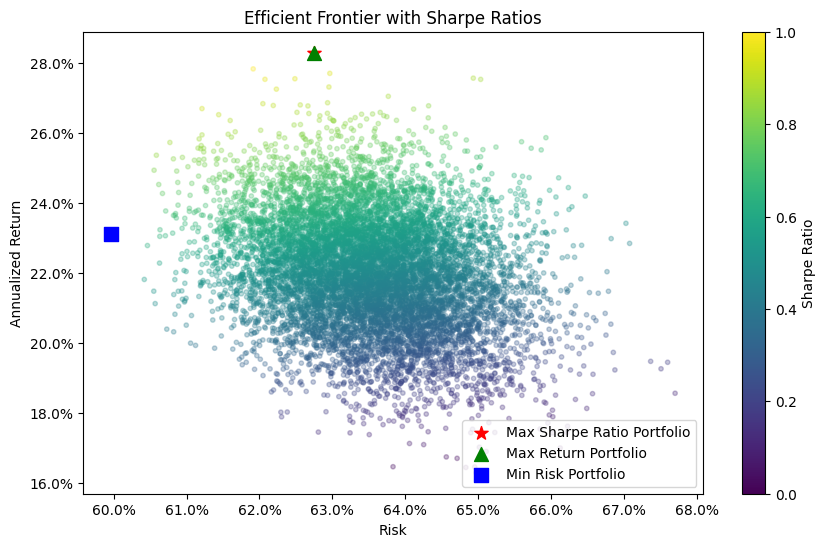

In [23]:
from matplotlib import pyplot as plt, ticker as mtick

# Plot efficient frontier by visualizing the portfolios' risk and return
plt.figure(figsize=(10, 6))
plt.scatter(portfolios["Risk"], portfolios["Return"], c=portfolios["Sharpe Ratio"], cmap="viridis", marker="o", s=10, alpha=0.3)
plt.scatter(max_sharpe_portfolio["Risk"], max_sharpe_portfolio["Return"], color="red", marker="*", s=100, label="Max Sharpe Ratio Portfolio")
plt.scatter(max_return_portfolio["Risk"], max_return_portfolio["Return"], color="green", marker="^", s=100, label="Max Return Portfolio")
plt.scatter(min_risk_portfolio["Risk"], min_risk_portfolio["Return"], color="blue", marker="s", s=100, label="Min Risk Portfolio")
plt.xlabel("Risk")
plt.ylabel("Annualized Return")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Efficient Frontier with Sharpe Ratios")
plt.colorbar(label="Sharpe Ratio")
plt.legend(loc="lower right")
plt.show()

The visualization effectively illustrates the balance between risk and return among the portfolios. The **Max Sharpe Ratio Portfolio** is noteworthy for its near-identical high return and risk to the **Max Return Portfolio**. In contrast, the **Min Risk Portfolio** manages to substantially limit risk to 60% but does so at the expense of the return, which is lower at approximately 23.5%. This stark contrast underscores the inherent trade-off between risk and return, and exemplifies the efficiency of the Max Sharpe Ratio Portfolio in balancing these two pivotal aspects of investment.

## Analyzing Portfolios
### Maximum Sharpe Ratio Portfolio
This portfolio represents an optimal blend of risk and return, adhering to the principle of maximizing returns per unit of risk. This balanced approach is designed for investors who seek to make the most of their investments while maintaining a level of risk they are comfortable with. Let's break down its structure and investigate the underlying strategies that contribute to its risk-adjusted performance.

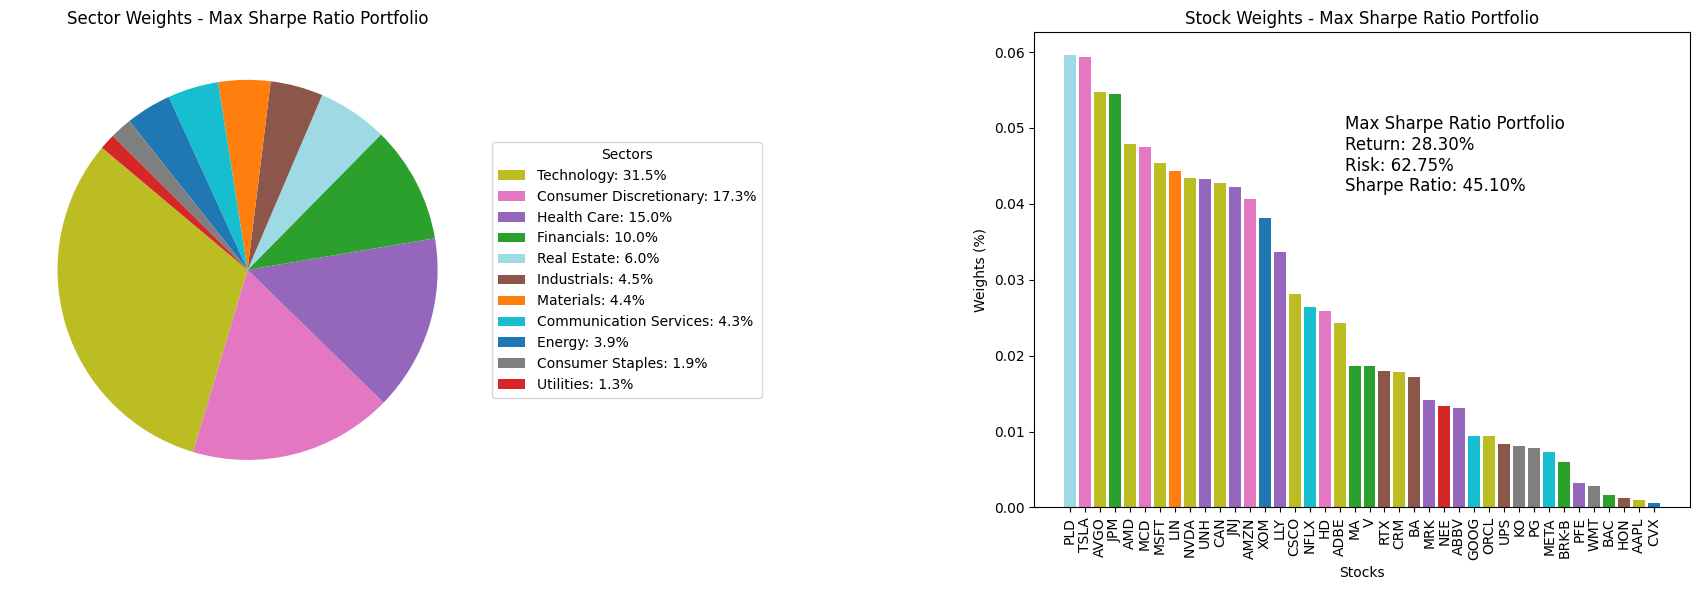

In [24]:
from portfolio_plotter import create_portfolio_figure

# Prepare data for Max Sharpe Ratio Portfolio
max_sharpe_data = {
    'sector_weights': max_sharpe_sector_weights,
    'stock_weights': max_sharpe_stock_weights,
}

# Plot weight distribution by sector, by stock and stats for the Max Sharpe Ratio Portfolio
create_portfolio_figure(max_sharpe_data, max_sharpe_portfolio, "Max Sharpe Ratio Portfolio", stocks_symbols, symbol_to_sector)

The Max Sharpe Ratio Portfolio achieves a high return of **28.30%** with a risk of **62.75%**, resulting in a Sharpe ratio of **45.10**. It is heavily weighted towards the **technology sector** at **31.5%**, suggesting a focus on growth. Other significant allocations include **consumer discretionary** at **17.3%** and **health care** at **15.0%**.

### Analyzing the Maximum Return Portfolio
This portfolio configuration aims for the highest possible returns, often taking on more risk. It is geared towards aggressive growth and is usually favored by investors with a high-risk tolerance. We'll explore its asset allocation and how it achieves these return

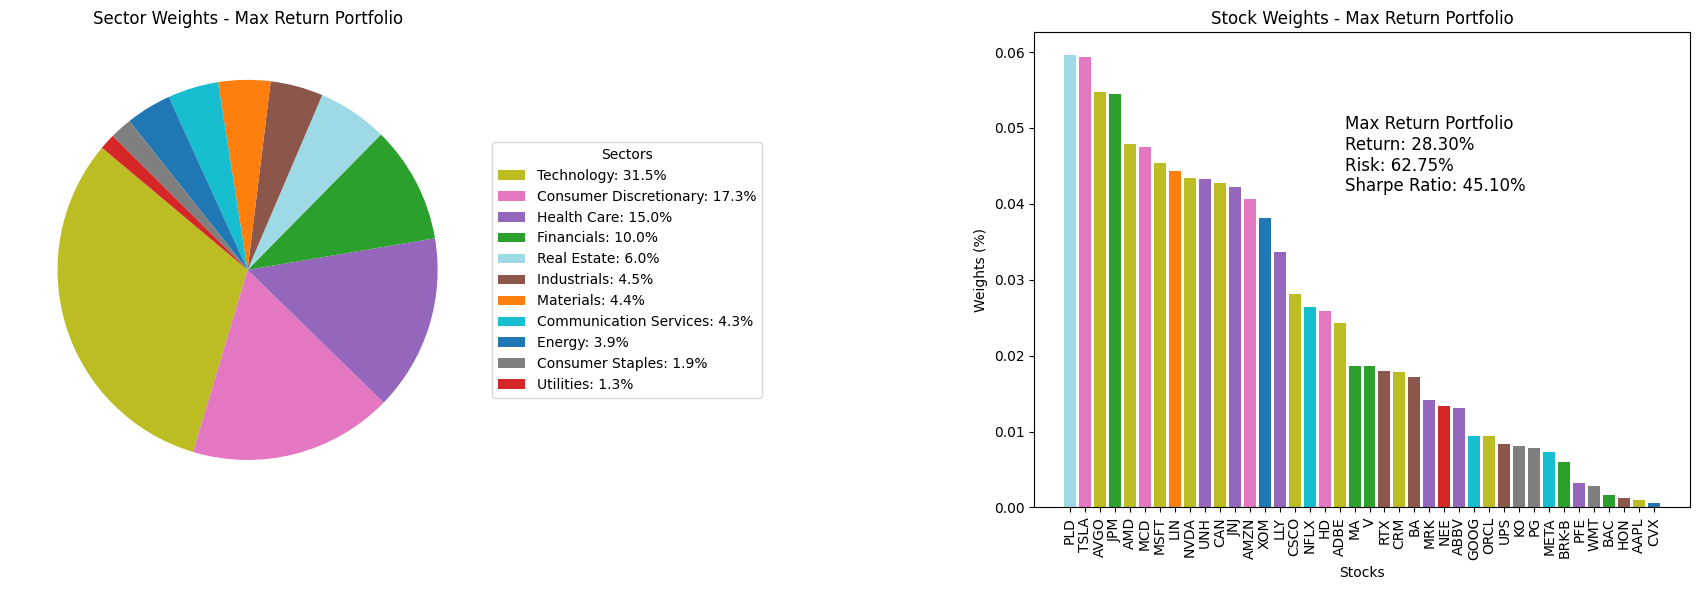

In [25]:
# Prepare data for Max Return Portfolio
max_return_data = {
    'sector_weights': max_return_sector_weights,
    'stock_weights': max_return_stock_weights,
}

# Plot weight distribution by sector, by stock and stats for the Max Return Portfolio
create_portfolio_figure(max_return_data, max_return_portfolio, "Max Return Portfolio", stocks_symbols, symbol_to_sector)

The Max Return Portfolio displays a high return of **28.22%** and a risk profile of **63.23%**, with a Sharpe ratio of **44.62**. The sector allocation is led by **technology**, making up **36.2%** of the portfolio, indicative of a strong emphasis on high-growth potential. The portfolio also has substantial positions in **communication services** and **financials**, representing **14%** and **11.1%** of the portfolio respectively. This composition aligns with a strategy aiming for maximum return, favoring sectors that are historically known for their higher return potential despite their associated risks.

### Analyzing the Minimum Risk Portfolio
This portfolio is constructed to minimize risk, often at the expense of higher returns. It is typically more conservative in nature. Let's delve into its composition and performance metrics.

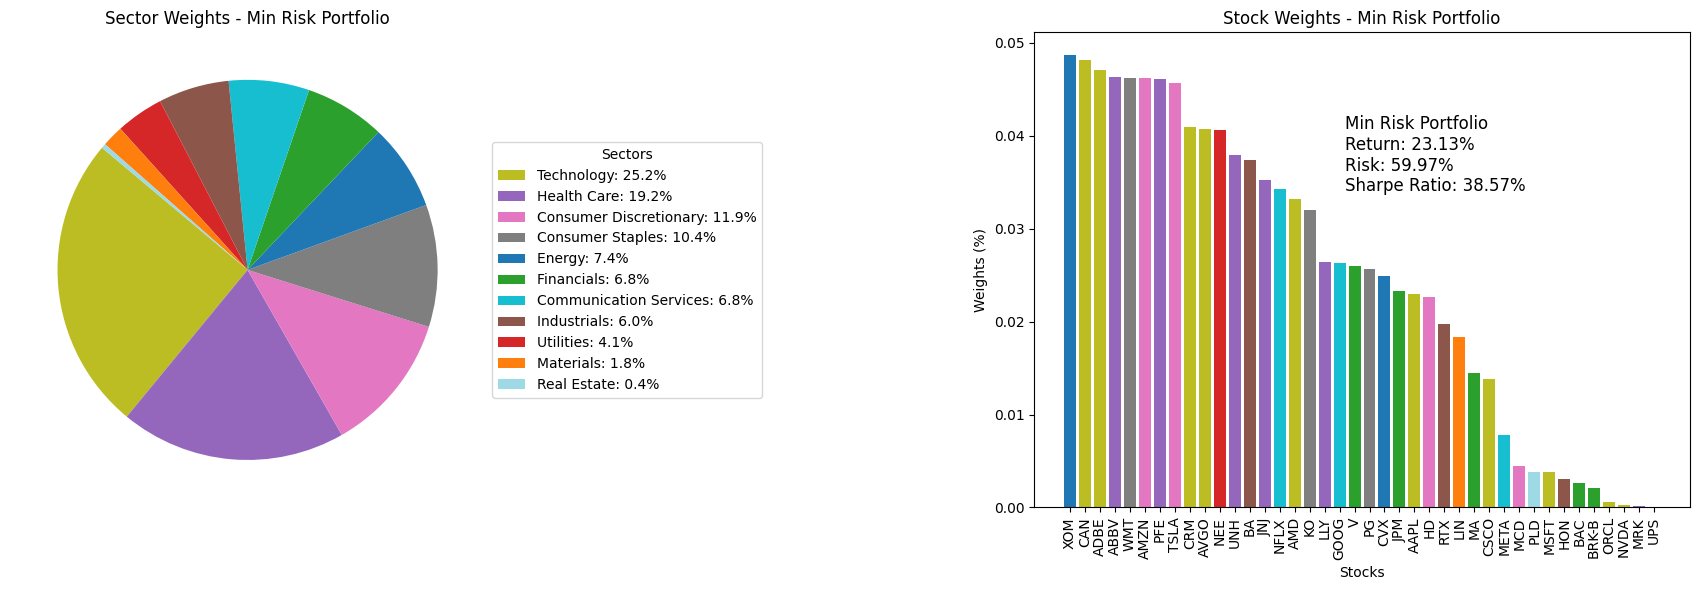

In [26]:
# Prepare data for Min Risk Portfolio
min_risk_data = {
    'sector_weights': min_risk_sector_weights,
    'stock_weights': min_risk_stock_weights,
}

# Using the custom function to visualize the Min Risk Portfolio
create_portfolio_figure(min_risk_data, min_risk_portfolio, "Min Risk Portfolio", stocks_symbols, symbol_to_sector)


The Minimum Risk Portfolio offers a **21.41%** return at a lower **59.86%** risk, achieving a **35.77** Sharpe ratio. A balanced distribution is noted, with **technology** and **health care** sectors carrying weights of **24%** and **19.7%** respectively. Unlike the Max Return and Max Sharpe portfolios, it leans towards a more risk-averse stance, demonstrated by a substantial allocation to stable, dividend-yielding sectors.

## Insights
### 1. Sector Weight Variations
In comparing the original sector weights to those in the selected portfolios, there are noticeable shifts.

**Max Sharpe Ratio Portfolio**: A notable increase in **technology** to **32.8%** and **consumer discretionary** to **15.7%**. Other sectors like energy and industrials also observe an uptick.

**Max Return Portfolio**: **Technology** rises to **33.1%** and **consumer discretionary** to **16.4%**, highlighting a tilt towards sectors associated with higher returns.

**Min Risk Portfolio**: A more balanced spread with **technology** and **consumer discretionary** dropping to **23%** and **20.2%**, respectively. An increase in traditionally safer sectors underscores its risk-averse nature.

### 2. Balancing Risk and Returns
An intrinsic trade-off exists between risk and returns. Efforts to minimize risk often lead to subdued returns, as exemplified by the Min Risk Portfolio. Conversely, portfolios like Max Sharpe Ratio and Max Return, characterized by elevated risk levels, also exhibit higher returns and Sharpe ratios. It accentuates the nuanced balance essential in portfolio optimization, where risk and returns are integrally linked, each influencing the other in determining the portfolio’s overall efficacy.

## Conclusions
In conclusion, the allocation across various sectors is instrumental in shaping the risk and return profile of a portfolio. We observed a pronounced inclination towards technology stocks in the Max Return and Max Sharpe Ratio portfolios, underscoring the sector’s pivotal role in amplifying returns, albeit with increased risk. Conversely, the Min Risk Portfolio exemplifies a diversified approach. It moderates risk through a balanced allocation, integrating stable sectors like healthcare and consumer staples to temper volatility. This analytical exercise underscores the intrinsic link between sector allocation and a portfolio’s overall performance metrics. It accentuates the necessity for a strategic approach to sector weighting, aligning with the investor's risk tolerance and return objectives, ensuring a bespoke investment experience tailored to individual preferences and goals.